Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



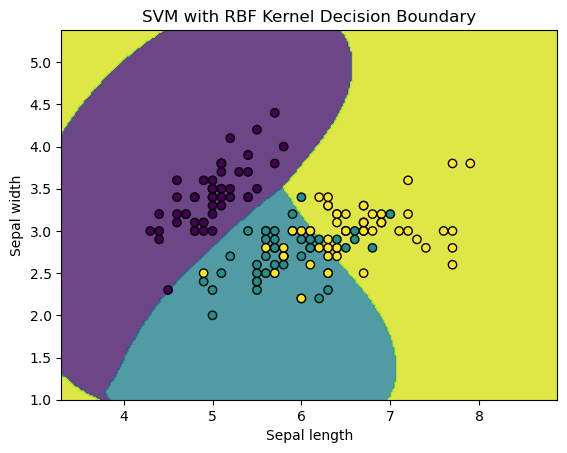

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load a dataset (Iris dataset for this example)
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with RBF kernel
clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM with RBF Kernel Decision Boundary')
plt.show()

**Solver Output Breakdown**

The output you see is from the cvxopt solver, which provides detailed information about the optimization process. Let's break down each component of the output to understand what it represents.

**Iteration Number**

Each line corresponds to an iteration of the solver's algorithm.

**Primal Cost (pcost)**

The primal cost is the value of the primal objective function at the current iteration. It represents the cost associated with the current solution from the primal perspective.

**Dual Cost (dcost)**

The dual cost is the value of the dual objective function at the current iteration. It represents the cost associated with the current solution from the dual perspective.

**Gap**

The gap is the difference between the primal and dual costs. It provides a measure of how close the current solution is to optimality. A smaller gap indicates a more optimal solution.

**Primal Residual (pres)**

The primal residual measures the violation of the primal constraints. It indicates how far the current solution is from satisfying the primal constraints. A smaller value indicates better satisfaction of the constraints.

**Dual Residual (dres)**

The dual residual measures the violation of the dual constraints. It indicates how far the current solution is from satisfying the dual constraints. A smaller value indicates better satisfaction of the constraints.

#### Iteration 0:

- **pcost**: -11.177
- **dcost**: -21.673
- **gap**: \(3 \times 10^2\) (300)
- **pres**: \(2 \times 10^1\) (20)
- **dres**: \(2 \times 10^0\) (2)

Initial iteration shows a large gap and high residuals, indicating the solution is far from optimal.

#### Iteration 1:

- **pcost**: -17.054
- **dcost**: -12.874
- **gap**: \(1 \times 10^2\) (100)
- **pres**: \(6 \times 10^0\) (6)
- **dres**: \(7 \times 10^{-1}\) (0.7)

Significant improvement, but still far from optimal.

#### Iteration 2:

- **pcost**: -50.844
- **dcost**: -25.693
- **gap**: \(1 \times 10^2\) (100)
- **pres**: \(4 \times 10^0\) (4)
- **dres**: \(5 \times 10^{-1}\) (0.5)

Further improvement in costs and residuals.

#### Iteration 3:

- **pcost**: -20.549
- **dcost**: -4.624
- **gap**: \(3 \times 10^1\) (30)
- **pres**: \(1 \times 10^0\) (1)
- **dres**: \(1 \times 10^{-1}\) (0.1)

Continued improvement, gap and residuals decreasing.

#### Iteration 4:

- **pcost**: -0.950
- **dcost**: -1.746
- **gap**: \(8 \times 10^{-1}\) (0.8)
- **pres**: \(1 \times 10^{-15}\)
- **dres**: \(8 \times 10^{-15}\)
we determine the optimal values of $\alpha$, which can then be used to find the optimal hyperplane for the SVM.


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.62      0.77      0.69        13
           2       0.80      0.67      0.73        18

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.81      0.80      0.80        45



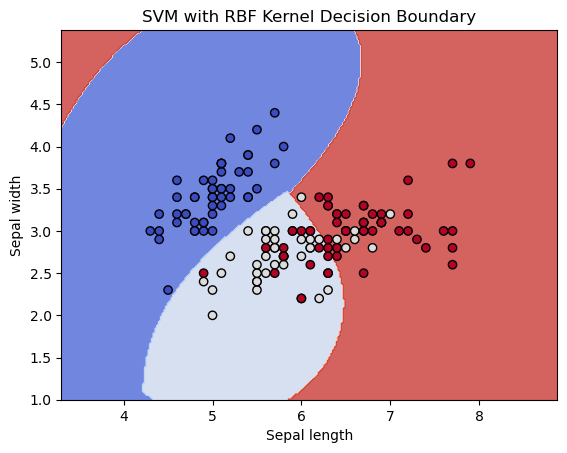

In [14]:
def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def split_dataset(X, y, test_size=0.3, random_state=49):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train, kernel='rbf', gamma=0.7, C=1.0):
    """
    Create and train an SVM classifier.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
        kernel (str): Specifies the kernel type to be used in the algorithm.
        gamma (float): Kernel coefficient.
        C (float): Regularization parameter.
    
    Returns:
        clf (SVC): Trained SVM classifier.
    """
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    return clf

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 3: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 4: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 5: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

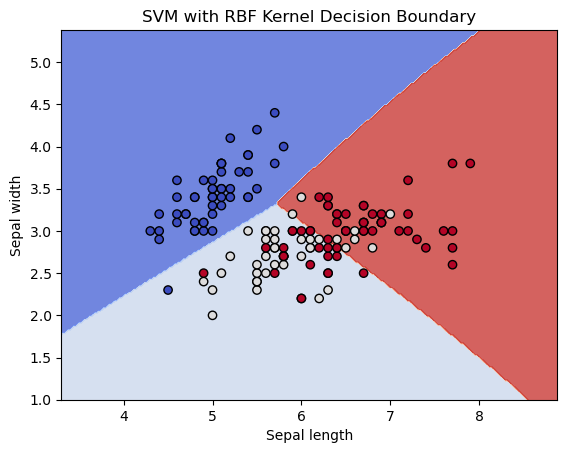

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def split_and_scale_dataset(X, y, test_size=0.3, random_state=42):
    """
    Split the dataset into training and testing sets and scale the features.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split and scaled dataset.
        scaler: Fitted scaler object.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, scaler

def create_and_train_svm(X_train, y_train):
    """
    Create and train an SVM classifier with hyperparameter tuning using GridSearchCV.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
    
    Returns:
        clf (SVC): Best trained SVM classifier from GridSearchCV.
    """
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    }
    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    
    print(f"Best parameters found: {grid.best_params_}")
    print(f"Best estimator found: {grid.best_estimator_}")
    
    return grid.best_estimator_

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, scaler, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        scaler: Fitted scaler object.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Split and scale the dataset
    X_train, X_test, y_train, y_test, scaler = split_and_scale_dataset(X, y)
    
    # Step 3: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 4: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 5: Plot the decision boundary
    plot_decision_boundary(clf, X, y, scaler)

if __name__ == "__main__":
    main()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

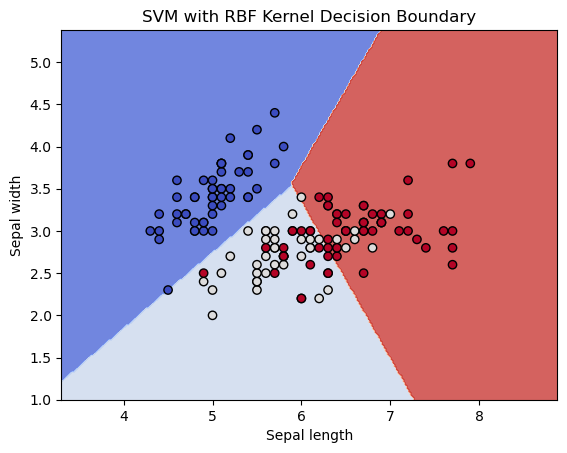

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def load_dataset():
    """
    Load the Iris dataset and select the first two features for visualization.
    
    Returns:
        X (np.ndarray): Feature matrix with the first two features.
        y (np.ndarray): Target vector.
    """
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # We only take the first two features for visualization purposes
    y = iris.target
    return X, y

def split_dataset(X, y, test_size=0.3, random_state=42):
    """
    Split the dataset into training and testing sets.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed used by the random number generator.
    
    Returns:
        X_train, X_test, y_train, y_test: Split dataset.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_and_train_svm(X_train, y_train):
    """
    Create and train an SVM classifier with hyperparameter tuning using GridSearchCV.
    
    Args:
        X_train (np.ndarray): Training feature matrix.
        y_train (np.ndarray): Training target vector.
    
    Returns:
        clf (SVC): Best trained SVM classifier from GridSearchCV.
    """
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    }
    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    
    print(f"Best parameters found: {grid.best_params_}")
    print(f"Best estimator found: {grid.best_estimator_}")
    
    return grid.best_estimator_

def evaluate_model(clf, X_test, y_test):
    """
    Evaluate the SVM classifier and print accuracy and classification report.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): Test target vector.
    """
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(clf, X, y, h=0.02):
    """
    Plot the decision boundary of the SVM classifier in the original 2D space.
    
    Args:
        clf (SVC): Trained SVM classifier.
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target vector.
        h (float): Step size in the mesh.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

def main():
    # Step 1: Load the dataset
    X, y = load_dataset()
    
    # Step 2: Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    
    # Step 3: Create and train the SVM classifier
    clf = create_and_train_svm(X_train, y_train)
    
    # Step 4: Evaluate the SVM classifier
    evaluate_model(clf, X_test, y_test)
    
    # Step 5: Plot the decision boundary
    plot_decision_boundary(clf, X, y)

if __name__ == "__main__":
    main()
